In [18]:
#image_path = 'data/drohne-signals/traffic_light0032.png'
image_path = 'data/traffic_light.png'


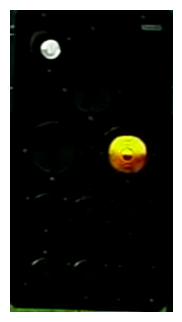

In [19]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

I = io.imread(image_path)

plt.rcParams['figure.dpi'] = 100
plt.axis('off')
plt.imshow(I)







315 169 4


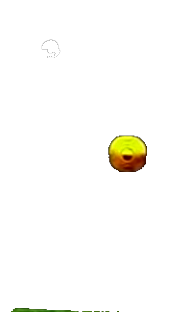

In [20]:
import numpy as np

def grey_filter(img):
    grey = np.copy(img)
    # rows, columns, and channels => (106, 83, 4)
    rows , columns, channels= grey.shape
    print(rows , columns, channels)
    for r in range(rows):   #for each column
       for c in range(columns):   
          red , green , blue , a = grey[r,c]
          whiteTrash = 200  
          if red > whiteTrash and green > whiteTrash and blue > whiteTrash:
              grey[r,c] = [ 255 , 255 , 255 , 255] #white
              continue
          #print(red , green , blue, int(red) - int(green) , int(red) - int(blue))
          tresh = 50
          if abs(int(red) - int(green)) < tresh and abs(int(red) - int(blue)) < tresh: # is grey
              grey[r,c] = [ 0 , 0 , 0 , 0] #black / transparent
              continue
          #grey[r,c] = [ 0 , 255 , 0, 255]
          #if red > green:
          #    cropped[r,c] = [ 255 , 0 , 0, 255]
          #if green > red:
          #    cropped[r,c] = [ 0 , 255 , 0, 255]
          #print(red , green , blue, int(red) - int(green) , int(red) - int(blue))
    return grey



import cv2
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float

I = io.imread(image_path)
if I.shape[2] == 3:
    I =  cv2.cvtColor(I, cv2.COLOR_RGB2RGBA);

    



grey = grey_filter(I)

plt.rcParams['figure.dpi'] = 100
plt.axis('off')
plt.imshow(grey)
plt.show()

In [23]:
import cv2

def find_ellipses(img): #img is grayscale image of what I want to fit
    
    
        imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret, thresh = cv2.threshold(imgray, 127, 255, 0)
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        #ret,thresh = cv2.threshold(img,127,255,0)
        #thresh = thresh.astype(np.uint8)
        #_,contours,hierarchy = cv2.findContours(thresh, 1, 2)
        print(contours)
        if len(contours) != 0:
            for cont in contours:
                if len(cont) < 5:
                    break
                elps = cv2.fitEllipse(cont)
                return elps  #only returns one ellipse for now
        return None
    
def find_contures(img): #img is grayscale image of what I want to fit
    
    
        imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret, thresh = cv2.threshold(imgray, 127, 255, 0)
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        #ret,thresh = cv2.threshold(img,127,255,0)
        #thresh = thresh.astype(np.uint8)
        #_,contours,hierarchy = cv2.findContours(thresh, 1, 2)
        
        return contours    


    
    

size 169 306
grey


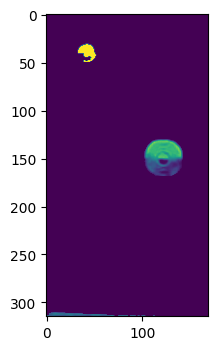

canny


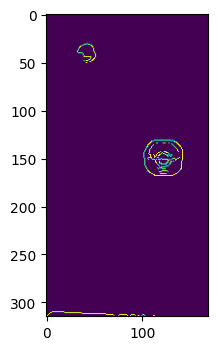

contours


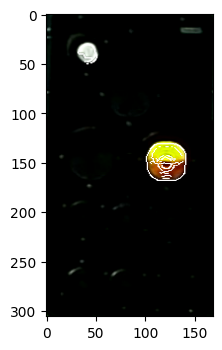

ellipse


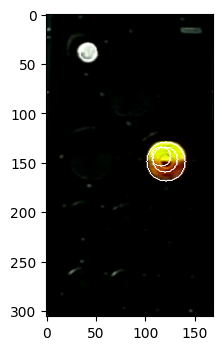

In [25]:
I = io.imread(image_path)
if I.shape[2] == 3:
    I =  cv2.cvtColor(I, cv2.COLOR_RGB2RGBA);
    
cropped = I

width = cropped.shape[1]
height = cropped.shape[0]
print("size",width,height)


print("grey")
imgray = cv2.cvtColor(grey, cv2.COLOR_BGR2GRAY)
plt.imshow(imgray)
plt.show()


print("canny")
thresh = 100 # initial threshold
canny = cv2.Canny(grey, thresh, thresh * 2)
plt.imshow(canny)
plt.show()


#print("thresh")
#ret, thresh = cv2.threshold(imgray, 127, 255, 0)
#plt.imshow(thresh)
#plt.show()


contours, hierarchy = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contour_img = np.copy(cropped)

cv2.drawContours(contour_img, contours, -1, (255,255,255), 1)

print("contours")
plt.imshow(contour_img)
plt.show()



# Find the rotated rectangles and ellipses for each contour
minRect = [None]*len(contours)
minEllipse = [None]*len(contours)
for i, c in enumerate(contours):
    minRect[i] = cv2.minAreaRect(c)
    if c.shape[0] > 5:
        minEllipse[i] = cv2.fitEllipse(c)

# Draw contours + rotated rects + ellipses
drawing = np.copy(cropped)
#drawing = np.zeros((cropped.shape[0], cropped.shape[1], 3), dtype=np.uint8)

for i, c in enumerate(contours):
    color = (255,255, 255)
    # contour

    #cv2.drawContours(drawing, contours, i, color)
    # ellipse
    if c.shape[0] > 5:
        ##### print("elipse",minEllipse[i])

        (x , y) , (xax,yax) , _ = minEllipse[i]
        ##### print("circle",x,y,"min",min(xax,yax),"max", max(xax,yax))

        #find circles
        if min(xax,yax) * 1.5 < max(xax,yax): continue;

        #with minsize
        if max(xax,yax) < 5: continue

        ypos = int(y * 100 / height)
        xpos = int(x * 100 / width)
        ###### print("ypos",ypos,"xpos",xpos)

        cv2.circle(drawing,(int(x),int(y)),int(max(xax,yax)/2),color,1)
        #cv2.ellipse(drawing, minEllipse[i], color, 1)
    # rotated rectangle
    #print("rect",minRect[i])

    box = cv2.boxPoints(minRect[i])
    box = np.intp(box) #np.intp: Integer used for indexing (same as C ssize_t; normally either int32 or int64)
    #cv2.drawContours(drawing, [box], 0, color)

print("ellipse")
plt.imshow(drawing)
plt.show()

#contours = find_contures(cropped)

#for cont in contours:
#    print(cont)
#plt.axis('off')
#plt.imshow(cropped)
#plt.show()
